# 本次任务对数据进行探索和分析
## 数据类型的分析
## 无关特征删除
## 缺失值处理

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 导入数据和查看数据的基本情况

In [4]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving data.csv to data (1).csv
User uploaded file "data.csv" with length 1957683 bytes


In [0]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('./data.csv', encoding='GBK')

In [6]:
display(data.shape)
data.head()

(1987, 90)

,Unnamed: 0,custid,trade_no,bank_card_no,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,reg_preference_for_trad,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,status,source,first_transaction_day,trans_day_last_12_month,id_name,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_query_time,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_latest_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
0,5,2791858,20180507115231274000000023057383,卡号1,0.01,0.99,0,0.90,0.55,0.313,17,27.0,26,3,NaN,19890,0,30,20130817,149050,151,0.40,34030,7,3920,0.15,1020,0.55,一线城市,4.0,19.0,4.0,19.0,1.0,1.0,2.0,2.0,5.0,2170,6.0,0.0,1970,18040,0.0,1,xs,1738,85,蒋红,583.0,79.0,8.0,2.0,6.0,10.0,2018-04-25,2.0,5.0,8.0,552.0,73.0,37.0,34.0,2.0,10.0,1.0,9.0,1.0,1.0,13.0,37.0,7.0,1.0,0.0,341.0,2018-04-19,2200.0,72.0,9.0,10.0,2900.0,1688.0,1200.0,75.0,1.0,2.0,1200.0,1200.0,12.0,18.0
1,10,534047,20180507121002192000000023073000,卡号1,0.02,0.94,2000,1.28,1.00,0.458,19,30.0,14,4,1.0,16970,0,23,20160402,302910,224,0.35,10590,5,6950,0.05,1210,0.50,一线城市,13.0,30.0,13.0,30.0,0.0,0.0,3.0,3.0,330.0,2100,9.0,0.0,1820,15680,0.0,0,xs,779,84,崔向朝,653.0,73.0,7.0,4.0,2.0,8.0,2018-05-03,2.0,6.0,8.0,635.0,76.0,37.0,36.0,0.0,17.0,5.0,12.0,2.0,2.0,8.0,49.0,4.0,2.0,1.0,353.0,2018-05-05,2000.0,74.0,12.0,12.0,3500.0,1758.0,15100.0,80.0,5.0,6.0,22800.0,9360.0,4.0,2.0
2,12,2849787,20180507125159718000000023114911,卡号1,0.04,0.96,0,1.00,1.00,0.114,13,68.0,22,1,NaN,9710,0,9,20170617,11520,31,1.00,5710,5,840,0.65,570,0.65,一线城市,0.0,68.0,0.0,68.0,0.0,3.0,6.0,6.0,0.0,0,3.0,0.0,0,0,0.0,1,xs,338,95,王中云,654.0,76.0,11.0,5.0,5.0,16.0,2018-05-05,5.0,5.0,14.0,633.0,83.0,4.0,2.0,0.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,157.0,2018-05-01,1500.0,77.0,2.0,2.0,1600.0,1250.0,4200.0,87.0,1.0,1.0,4200.0,4200.0,2.0,6.0
3,13,1809708,20180507121358683000000388283484,卡号1,0.00,0.96,2000,0.13,0.57,0.777,22,14.0,6,3,NaN,6210,0,33,20130516,491130,360,0.15,91690,7,46850,0.05,1290,0.45,三线城市,6.0,8.0,6.0,8.0,0.0,1.0,8.0,8.0,31700.0,8140,9.0,0.0,2700,27970,0.0,0,xs,1831,82,何洋洋,595.0,79.0,12.0,7.0,4.0,22.0,2018-05-05,3.0,16.0,17.0,542.0,75.0,85.0,81.0,4.0,22.0,5.0,17.0,2.0,4.0,34.0,91.0,26.0,2.0,0.0,355.0,2018-05-03,1800.0,74.0,17.0,18.0,3200.0,1541.0,16300.0,80.0,5.0,5.0,30000.0,12180.0,2.0,4.0
4,14,2499829,20180507115448545000000388205844,卡号1,0.01,0.99,0,0.46,1.00,0.175,13,66.0,42,1,NaN,11150,0,12,20170312,61470,63,0.65,9770,6,760,1.00,1110,0.50,一线城市,0.0,66.

In [7]:
# 查看数据的情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 90 columns):
Unnamed: 0                                    1987 non-null int64
custid                                        1987 non-null int64
trade_no                                      1987 non-null object
bank_card_no                                  1987 non-null object
low_volume_percent                            1987 non-null float64
middle_volume_percent                         1987 non-null float64
take_amount_in_later_12_month_highest         1987 non-null int64
trans_amount_increase_rate_lately             1986 non-null float64
trans_activity_month                          1987 non-null float64
trans_activity_day                            1987 non-null float64
transd_mcc                                    1987 non-null int64
trans_days_interval_filter                    1986 non-null float64
trans_days_interval                           1987 non-null int64
regional_mobility    

### 对数据进行去重并分割X和Y

In [0]:
data['y'] = data['status']
data.drop('status', axis=1, inplace=True)

In [9]:
# 去重
data = data.drop_duplicates()
data.shape

(1987, 90)

In [10]:
# 经过类似X['cusid'].value_counts()的观测，决定删除['cusid', 'bank_card_no', trade_no]
# X = X.drop([''Unnamed: 0', 'cusid', 'bank_card_no', 'trade_no'], axis=1, inplace=True)
# X.shape

data.drop(['custid', 'trade_no', 'bank_card_no', 'Unnamed: 0'], axis=1, inplace=True)
data.shape

(1987, 86)

### 对X数据中类型为object的数据进行分析

In [11]:
display(data.describe())

obj_cols = [i for i in data.columns if data[i].dtype=='object']
display(obj_cols)

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,student_feature,repayment_capability,is_high_user,number_of_trans_from_2011,first_transaction_time,historical_trans_amount,historical_trans_day,rank_trad_1_month,trans_amount_3_month,avg_consume_less_12_valid_month,abs,top_trans_count_last_1_month,avg_price_last_12_month,avg_price_top_last_12_valid_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,cross_consume_count_last_1_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,max_consume_count_later_6_month,railway_consume_count_last_12_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,jewelry_consume_count_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_org_count,query_finance_count,query_cash_count,query_sum_count,latest_one_month_apply,latest_three_month_apply,latest_six_month_apply,loans_score,loans_credibility_behavior,loans_count,loans_settle_count,loans_overdue_count,loans_org_count_behavior,consfin_org_count_behavior,loans_cash_count,latest_one_month_loan,latest_three_month_loan,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_credibility_limit,loans_org_count_current,loans_product_count,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,y
count,1987.000000,1987.000000,1987.000000,1986.000000,1987.000000,1987.000000,1987.000000,1986.000000,1987.000000,1987.000000,737.0,1.987000e+03,1987.000000,1987.000000,1.987000e+03,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,1947.000000,1986.000000,1986.000000,1986.000000,1986.000000,1816.000000,1980.000000,1980.000000,1980.000000,1.976000e+03,1987.000000,1986.000000,1984.000000,1987.000000,1987.000000,1984.000000,1987.000000,1987.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1863.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1866.000000,1862.000000,1866.000000,1987.000000
mean,0.021721,0.902974,2042.425767,2.817815,0.809904,0.364835,17.554605,29.419940,22.003523,2.665828,1.0,1.875639e+04,0.012079,22.857071,2.015156e+07,2.275567e+05,175.003523,0.473327,37926.748868,6.59235,9253.457474,0.346150,1230.966281,0.516692,7.173212,19.852467,7.101208,20.319738,0.690529,1.627273,4.482323,5.218182,1.691015e+05,2651.872169,6.135952,0.023690,1122.028183,18545.848012,0.012097,1020.692501,88.942124,577.771337,75.992485,11.805690,5.932904,3.743425,16.713902,4.312399,8.682233,12.265700,544.394751,75.449384,35.316551,30.446170,2.321907,12.663451,4.660236,8.003215,0.943730,2.756699,13.681136,42.502144,17.613612,1.207931,1.247053,334.586817,2104.608789,72.328510,8.003215,8.567524,3383.547696,1829.707931,9143.783494,75.860665,4.660236,5.147910,16211.897106,7960.488746,23.241676,54.467310,0.248113
std,0.037036,0.142783,4246.706366,18.004607,0.194809,0.168987,4.510524,23.678405,17.332466,0.882329,0.0,4.678787e+04,0.109264,9.715992,1.440958e+04,2.434274e+05,97.468649,0.261725,47140.914294,1.35155,25606.760407,0.347189,822.038627,0.100442,5.299228,12.714334,5.457445,12.865120,2.493637,1.830477,4.633859,4.937801,3.892514e+05,4

['reg_preference_for_trad',
 'source',
 'id_name',
 'latest_query_time',
 'loans_latest_time']

In [12]:
data[obj_cols].head()

,reg_preference_for_trad,source,id_name,latest_query_time,loans_latest_time
0,一线城市,xs,蒋红,2018-04-25,2018-04-19
1,一线城市,xs,崔向朝,2018-05-03,2018-05-05
2,一线城市,xs,王中云,2018-05-05,2018-05-01
3,三线城市,xs,何洋洋,2018-05-05,2018-05-03
4,一线城市,xs,赵洋,2018-04-15,2018-01-07


In [13]:
display(data['reg_preference_for_trad'].value_counts())
display(data['source'].value_counts())

一线城市    1409
三线城市     467
境外        57
二线城市      52
其他城市       2
Name: reg_preference_for_trad, dtype: int64

xs    1987
Name: source, dtype: int64

In [14]:
data.drop(['source', 'id_name'], axis=1, inplace=True)
data.shape

(1987, 84)

In [15]:
# 对城市进行数值化操作
map_dict = {'一线城市': 1, '二线城市':2, '三线城市': 3, '境外': 4, '其他城市': 5,}
data['reg_preference_for_trad'] = data['reg_preference_for_trad'].map(map_dict)
data['reg_preference_for_trad'].head()

0    1
1    1
2    1
3    3
4    1
Name: reg_preference_for_trad, dtype: int64

In [16]:
data.drop(['latest_query_time', 'loans_latest_time'], axis=1, inplace=True)
data.shape

(1987, 82)

### 填充填充缺失值

In [0]:
# 删除缺失列中小于10的数据的行数据
data_miss = pd.DataFrame(data.isnull().sum(), columns=['num_null'])
data_miss_col = data.columns[data_miss['num_null'] < 10]
data = data.dropna(subset=data_miss_col)

### 使用中值进行填充

In [0]:
for i in data.keys():
    data[i].fillna(data[i].median(), inplace=True)
# data.isnull().sum().sort_values(ascending=False)

### 相关性分析

In [0]:
Y = data['y']
X = data.drop(['y'], axis=1)

In [0]:
# 方差过滤

from sklearn.feature_selection import VarianceThreshold
X_fsvar = VarianceThreshold().fit_transform(X) 

In [0]:
# 互信息法
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
result = MIC(X,Y)
k = result.shape[0] - sum(result <= 0)

In [22]:
X_fsmic = SelectKBest(MIC, k).fit_transform(X, Y)
cross_val_score(RFC(n_estimators=10,random_state=0),X_fsmic,Y,cv=5).mean()

0.7799584938896127

In [23]:
X_fsmic.shape

(1977, 48)

### 划分训练集和测试集

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_fsmic, Y, random_state=2018, test_size=0.3)

## 各类算法尝试

### 随机森林

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':list(range(30,150,20)),
              'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(50,201,20)),
              'min_samples_leaf':list(range(10,60,10))}
clf0 = GridSearchCV(estimator = RandomForestClassifier(max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5, n_jobs=-1)

clf0.fit(x_train,y_train)
clf0.score(x_test, y_test)

0.8075825825825826

### XGBoost

In [28]:
from xgboost import XGBClassifier as XGBC
param_test = {
    'max_depth': list(range(3,10,2)),
    'min_child_weight': list(range(1,6,2)),
    'gamma': [i/10.0 for i in range(0,5)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
    'n_estimators':list(range(80, 150, 20))
}
clf1 = GridSearchCV(estimator=XGBC(random_state=10),param_grid=param_test, cv=5, n_jobs=-1)
clf1.fit(x_train, y_train)
clf1.score(x_test, y_test)


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0.7946127946127947

### 逻辑回归

In [29]:
from sklearn.linear_model import LogisticRegression as LR

param_test = {'solver' : ['liblinear', 'lbfgs', 'newton-cg', 'sag']}
clf2 = GridSearchCV(estimator=LR(penalty='l2', dual=False, tol=0.0000001),param_grid=param_test,
                   cv=5, n_jobs=6)
clf2.fit(x_train, y_train)

display(clf2.score(x_train, y_train))
clf2.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


0.7968185104844541

0.7760942760942761

### SVC

In [30]:
from sklearn.svm import SVC

# param_test = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

param_test = {'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

clf3 = GridSearchCV(estimator=SVC(kernel='rbf', probability=True),param_grid=param_test, cv=5, n_jobs=-1)

clf3.fit(x_train, y_train)
clf3.score(x_test, y_test)

0.7474747474747475

### 决策树

In [31]:
from sklearn.tree import DecisionTreeClassifier

param_test1 = {'max_depth':list(range(3,14,2)), 
               'min_samples_split':list(range(50,201,20)),
              'min_samples_leaf':list(range(10,60,10))}

clf4 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_test1, cv=5, n_jobs=-1)

clf4.fit(x_train, y_train)
clf4.score(x_test, y_test)

0.7643097643097643

## Stacking

In [0]:
from mlxtend.classifier import StackingClassifier

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4],
                          use_probas=True,
                          average_probas=True,
                          meta_classifier=clf0)

sclf.fit(x_train, y_train)
sclf.score(x_test, y_test)

## 绘制图像

模型名称: Random Forest Classifier
准确率:0.7761,精确率:0.7931,召回率:0.1533,f1-score:0.2570,auc:0.5699


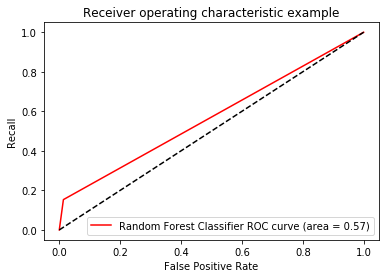

模型名称: Xgboost Classifier
准确率:0.7946,精确率:0.6591,召回率:0.3867,f1-score:0.4874,auc:0.6595


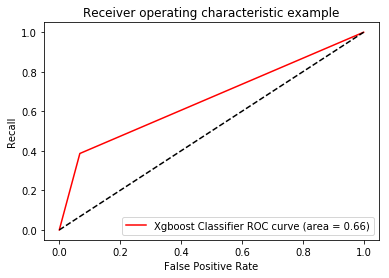

模型名称: LogisticRegression
准确率:0.7761,精确率:0.6308,召回率:0.2733,f1-score:0.3814,auc:0.6096


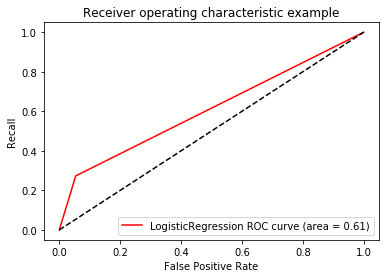

模型名称: Support Vector Machine Classifier
准确率:0.7475,精确率:0.0000,召回率:0.0000,f1-score:0.0000,auc:0.5000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


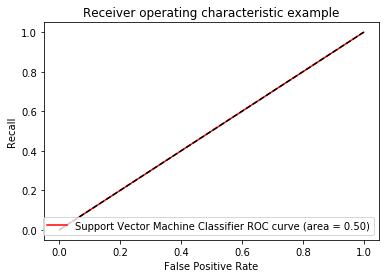

模型名称: Decision Tree Classifier
准确率:0.7643,精确率:0.5532,召回率:0.3467,f1-score:0.4262,auc:0.6260


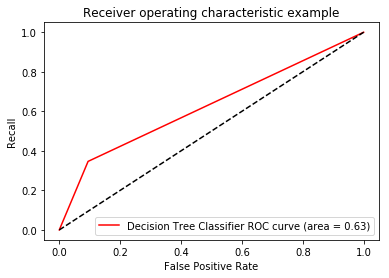

In [35]:
from sklearn import metrics
import matplotlib.pyplot as plt

classifiers = {
        'Random Forest Classifier' : clf0,
        'Xgboost Classifier' : clf1,
        'LogisticRegression' : clf2,
        'Support Vector Machine Classifier' : clf3,
        'Decision Tree Classifier' : clf4,
        }

for model_name,model in classifiers.items():
    print('模型名称:',model_name)
    y_test_pred = model.predict(x_test)
    acc = metrics.accuracy_score(y_test,y_test_pred)
    precision = metrics.precision_score(y_test,y_test_pred)
    recall = metrics.recall_score(y_test,y_test_pred)
    f1 = metrics.f1_score(y_test,y_test_pred)
    auc = metrics.roc_auc_score(y_test,y_test_pred)
    print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))
    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score as AUC

    plt.rcParams['font.sans-serif'] = 'SimHei'
    plt.figure()

    #plt.figure()  #只建立一个画布，将所有的ROC曲线在一个画布上画出来
    FPR, recall, thresholds = roc_curve(y_test,y_test_pred, pos_label=1)
    area = AUC(y_test,y_test_pred)
    plt.plot(FPR, recall,color='red',label='{} ROC curve (area = {:.2f})'.format(model_name,area))
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Recall')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [0]:
from google.colab import files
with open('data_model_521.ipynb', 'w') as f:
      f.write('some content')
files.download('example.txt')